In [4]:
"""
Example of Steve Brunton's demonstration on undetermined compressed sensing problems.
https://www.youtube.com/watch?v=_-Jkq-Faa2Y&list=PLMrJAkhIeNNRHP5UA-gIimsXLQyHXxRty&index=5
"""

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size': 18})

# Solve underdetermined y = Theta * s for "s"
n = 1000  # dimension of s
p = 200 # number of measurements, dim(y) 
Theta = np.random.randn(p, n)
y = np.random.randn(p)

""" L1 min norm solution s_L1 """
def L1_norm(x):
    return np.linalg.norm(x, ord=1)

constraints = ({'type': 'eq', 'fun': lambda x: Theta @ x - y})

# Initialise with L2 solution
x0 = np.linalg.pinv(Theta) @ y  # 'pinv' is the Moore-Penrose pseudo-inverse

# SLSQP: Sequential Least SQuares Programming
residual = minimize(L1_norm, x0, method='SLSQP', constraints=constraints)
s_L1 = residual.x

In [5]:
""" L2 min norm solution s_L2 """
s_L2 = np.linalg.pinv(Theta) @ y  # same as x0 above

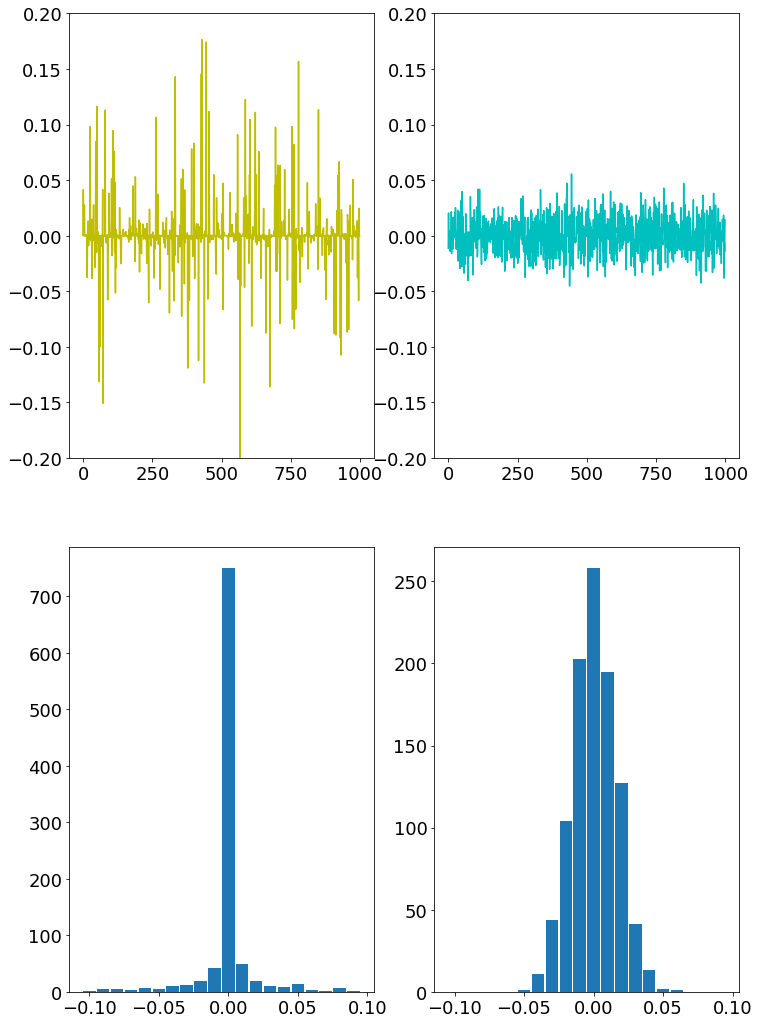

In [6]:
# Plot the results
fig, axs = plt.subplots(2, 2)
axs = axs.reshape(-1)
axs[0].plot(s_L1, color='y', linewidth=1.5)
axs[0].set_ylim(-0.2, 0.2)
axs[1].plot(s_L2, color='c', linewidth=1.5)
axs[1].set_ylim(-0.2, 0.2)
axs[2].hist(s_L1, bins=np.arange(-0.105, 0.105, 0.01), rwidth=0.9)
axs[3].hist(s_L2, bins=np.arange(-0.105, 0.105, 0.01), rwidth=0.9)
plt.show()